<a href="https://colab.research.google.com/github/phutaekwondo/CS114.L21/blob/main/BT_colab_so_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url_train = 'http://cs.uit.edu.vn/data2.txt?fbclid=IwAR11i7MdMWgqg6i1ab0z3C1VRJLM_6BpnjlpS_hZmNhlBJeYjDihp479fnU'
url_test_1 = 'http://cs.uit.edu.vn/data3.txt?fbclid=IwAR0xQwlnCNoEWthoc8txwpYSHFuf-lo6KOAXMzum53EWy89fJChAaUqGzB8'
url_test_2 = 'http://cs.uit.edu.vn/data4.txt?fbclid=IwAR0fXuM2Q29pRBldP-sv9znzwYQCRCGe-VHLSvGeUcrvhkFR2UhxtCddIZQ'

In [ ]:
data_train = pd.read_csv(url_train, header=None, names = ['x', 'y'])
data_test_1 = pd.read_csv(url_test_1, header=None, names = ['x', 'y'])
data_test_2 = pd.read_csv(url_test_2, header=None, names = ['x', 'y'])
X_train, y_train = np.array(data_train['x']).reshape(-1,1), np.array(data_train['y'])
X_test_1, y_test_1 = np.array(data_test_1['x']).reshape(-1,1), np.array(data_test_1['y'])
X_test_2, y_test_2 = np.array(data_test_2['x']).reshape(-1,1), np.array(data_test_2['y'])
y_data = np.concatenate((y_train, y_test_1, y_test_2))
X_data = np.concatenate((X_train, X_test_1, X_test_2))

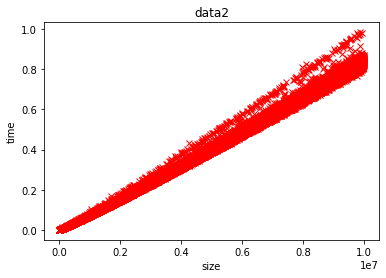

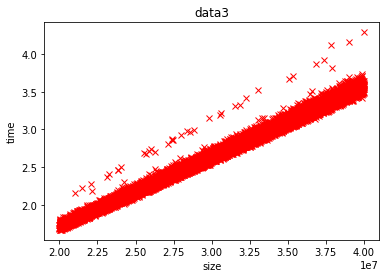

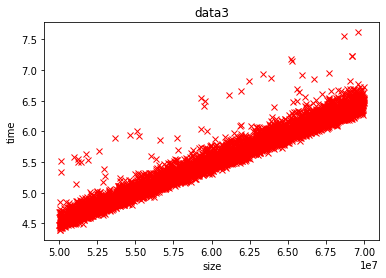

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_train, y_train, "x", color='red')
plt.title("data2")
plt.xlabel('size')
plt.ylabel('time')
plt.show()

plt.plot(X_test_1, y_test_1, "x", color='red')
plt.title("data3")
plt.xlabel('size')
plt.ylabel('time')
plt.show()

plt.plot(X_test_2, y_test_2, "x", color='red')
plt.title("data3")
plt.xlabel('size')
plt.ylabel('time')
plt.show()

In [170]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

def show_MSE(estimated, test):
    value1 = mse(estimated, test)
    value2 = mae(estimated, test)
    print('Mean squared error:', value1)
    print('Mean absolute error:', value2)

def draw_plot(X, y, estmated, name):
  r_sq = r2_score(estmated, y)
  print(name + ':')
  print('R squre:', r_sq)
  show_MSE(estmated, y)
  plt.plot(X, y, "x", color='red')
  plt.plot(X, estmated)
  plt.title(name)
  plt.xlabel('size')
  plt.ylabel('time')
  plt.show()

In [193]:
prediction = np.concatenate((prediction_train, prediction_test_1, prediction_test_2))
def draw_full(prediction, X=X_data, y=y_data):
  plt.plot(X, y, "x", color='red')
  plt.plot(X, prediction)
  plt.title("data")
  plt.xlabel('size')
  plt.ylabel('time')
  plt.show()

# **Kiến tạo các mô hình**

Công thức chung:

Polynomial Features Transformation Fuction

$h(x) = \theta_0 + \theta_1 * x + ... + \theta_n * x^n$

In [172]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [194]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial(X, y, number):
  polynomial_features= PolynomialFeatures(degree=number)
  x_poly = polynomial_features.fit_transform(X)

  #Train data
  pol_LR = model.fit(x_poly, y)
  prediction_train = pol_LR.predict(x_poly)
  draw_plot(X, y, prediction_train, 'data train')

  #Test1_data
  X_test_1_poly = polynomial_features.fit_transform(X_test_1)
  prediction_test_1 = pol_LR.predict(X_test_1_poly)
  draw_plot(X_test_1, y_test_1, prediction_test_1, 'data test 1')

  #Test2_data
  X_test_2_poly = polynomial_features.fit_transform(X_test_2)
  prediction_test_2 = pol_LR.predict(X_test_2_poly)
  draw_plot(X_test_2, y_test_2, prediction_test_2, 'data test 2')

  #draw full data
  estimated_full = np.concatenate((prediction_train, prediction_test_1, prediction_test_2))
  draw_full(estimated_full)


***Đây chính là mô hình simple linear regression***

data train:
R squre: 0.9975866892874395
Mean squared error: 0.00014337728721748832
Mean absolute error: 0.008291970317762347


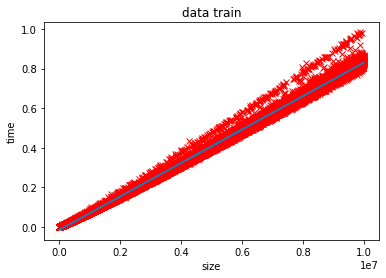

data test 1:
R squre: 0.9128585419715596
Mean squared error: 0.020664949397549138
Mean absolute error: 0.12271198006925255


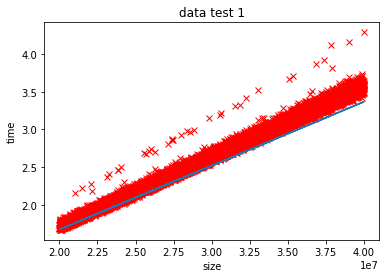

data test 2:
R squre: 0.06686808412903045
Mean squared error: 0.22348476817426108
Mean absolute error: 0.45201138673289265


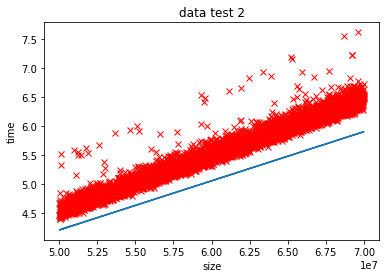

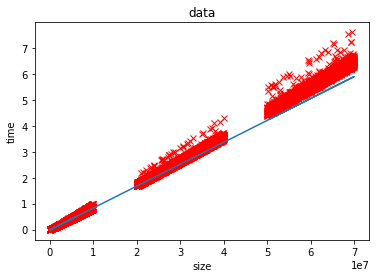

In [195]:
polynomial(X_train, y_train, 1)

data train:
R squre: 0.9979257340000984
Mean squared error: 0.00012327598540427578
Mean absolute error: 0.007073665718015936


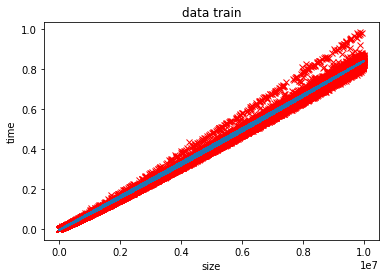

data test 1:
R squre: 0.7897335244514863
Mean squared error: 0.09177695238564393
Mean absolute error: 0.2703565635200137


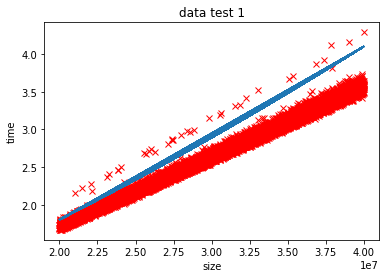

data test 2:
R squre: -1.667326264741582
Mean squared error: 2.034187428861318
Mean absolute error: 1.3859805816162731


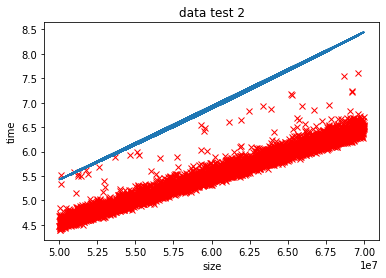

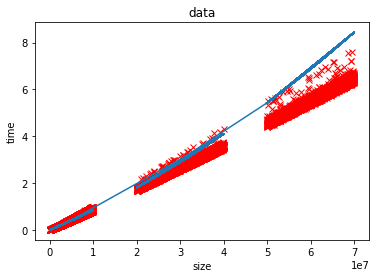

In [201]:
#quadratic function regression
polynomial(X_train, y_train, 2)

data train:
R squre: -2.1473901933842613e+30
Mean squared error: 0.05955441229040034
Mean absolute error: 0.21145692332774532


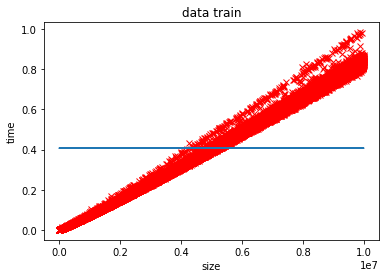

data test 1:
R squre: -4.290529670817179e+32
Mean squared error: 5.288486124997577
Mean absolute error: 2.236026880612991


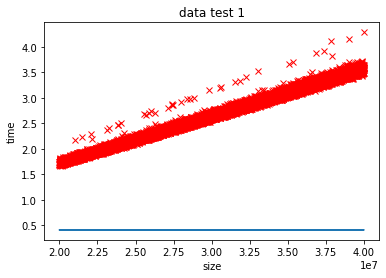

data test 2:
R squre: -9.50998775156144e+32
Mean squared error: 26.374421061342748
Mean absolute error: 5.103708439916586


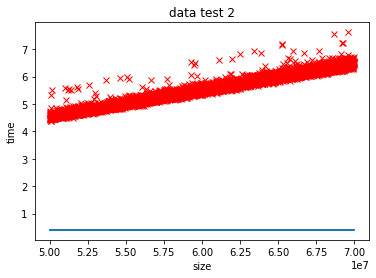

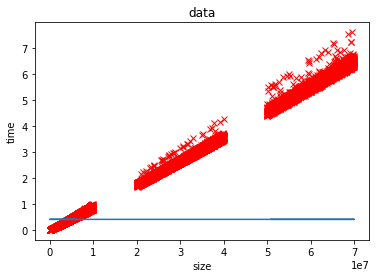

In [202]:
#cubic function regression
polynomial(X_train, y_train, 0)

Phát hiện ra khi ta tăng bậc đa thức thì thấy MSE càng lớn, nhưng mà bậc nhỏ đến mức nào đó MSE cũng sẽ cáo, trong những phần em thử với đa thức bậc nhất (simple linear regression) là model tốt nhất.
Vậy nên nên thử một loại regression là đa thức có căn.

$h(x) = \theta  \sqrt{x}$



sqrt model train:
R squre: 0.947642533438481
Mean squared error: 0.0029629838236181426
Mean absolute error: 0.0442600235201748


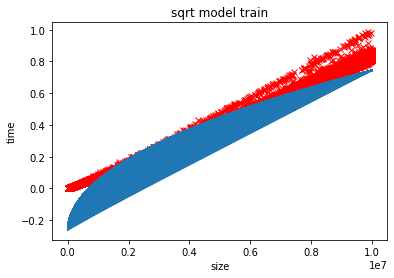

sqrt model test 1:
R squre: 0.98557883699351
Mean squared error: 0.004103774683712889
Mean absolute error: 0.04795891967797369


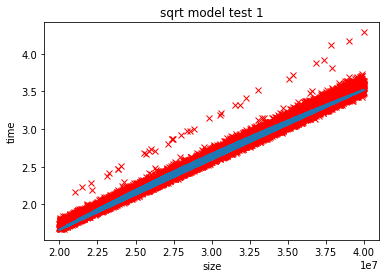

sqrt model test 2:
R squre: 0.9531823262724055
Mean squared error: 0.01460595619017211
Mean absolute error: 0.0828333461220945


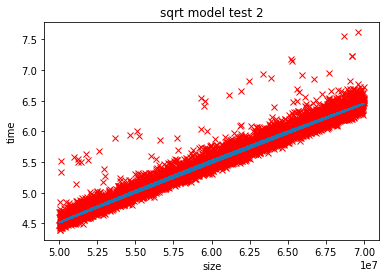

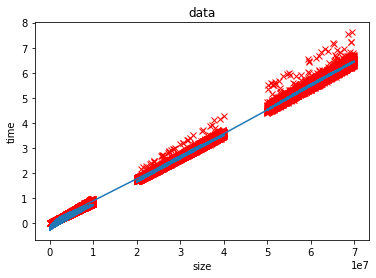

In [200]:
feature_train = np.sqrt(X_train)
model_sqrt = LinearRegression().fit(feature_train, y_train)
sqrt_predict = model_sqrt.predict(feature_train)
draw_plot(X_train, y_train, sqrt_predict, 'sqrt model train')

feature_test1 = np.sqrt(X_test_1)
model_sqrt = LinearRegression().fit(feature_test1, y_test_1)
sqrt_predict_1 = model_sqrt.predict(feature_test1)
draw_plot(X_test_1, y_test_1, sqrt_predict_1, 'sqrt model test 1')

feature_test2 = np.sqrt(X_test_2)
model_sqrt = LinearRegression().fit(feature_test2, y_test_2)
sqrt_predict_2 = model_sqrt.predict(feature_test2)
draw_plot(X_test_2, y_test_2, sqrt_predict_2, 'sqrt model test 2')

estimated_full_sqrt = np.concatenate((sqrt_predict, sqrt_predict_1, sqrt_predict_2))
draw_full(estimated_full_sqrt, X_data, y_data)